In [26]:
import pandas as pd
import missingno as msno
import random
import matplotlib.pyplot as plt

In [2]:
# создать датафрейм можно вручную
df = pd.DataFrame([[1,'Bob', 'Builder'],
                  [2,'Sally', 'Baker'],
                  [3,'Scott', 'Candle Stick Maker']], 
columns=['id','name', 'occupation'])

In [3]:
df = pd.read_csv('train.csv') # вот так открываем документ
pd.concat([df.head(5), df.tail(5)]) # вот так выводим строки
# дополнительные возможности
# можно брать данные из EXEL файлов 

# df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# еще можно читать SQL файлы, что более трудно, но всё равно возможно

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
df.shape # узнаем сколько строк и сколько столбцов содержит датафрейм. Можно обратитьс к [0] или [1] элементу.

(891, 12)

In [5]:
df.count() # узнаем количество ненулевых значени в каждом столбце

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
df.dtypes # узнаем типы данных в столбцах

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
Возможные задачи, которые можно решать на этих данных
1. Задача регрессии - найти стоимость билета пассажира
2. Задача классификации - выжил ли пассажир
3. Задача кластеризации - найти группы возрастов людей, которые выжили в большинстве

In [7]:
# отбор по условию 
survived = df[df["Survived"] == 1] # в данной строке мы создаем булеву серию по которой в датайрейме фильтруем строки и создаем новый датафрейм, с выжившими
survived_female = survived[survived["Sex"] == 'female'].shape[0] / df.shape[0] # проводим доп фильтрацию по полу и делим на количество строк
survived_male = survived[survived["Sex"] == 'male'].shape[0] / df.shape[0]
print("Доля выживших:", df["Survived"].mean())
print("Доля выживших женщин:", survived_female)
print("Доля выживших мужчин:", survived_male)

Доля выживших: 0.3838383838383838
Доля выживших женщин: 0.2615039281705948
Доля выживших мужчин: 0.122334455667789


In [8]:
alter = df[df["Survived"] == 1]
viz = alter.shape[0] / df.shape[0] # альтернативный способ подсчитать долю выживших 
print(viz)

0.3838383838383838


In [9]:
cl = df[df["Pclass"] == 1] # оказывается среди пассажиров первого класса спаслось  больше мужчин
wocl = cl[cl["Sex"] == 'female'].shape[0] / cl.shape[0]
macl = cl[cl["Sex"] == "male"].shape[0] / cl.shape[0]
print(wocl)
print(macl)

0.4351851851851852
0.5648148148148148


In [10]:
# сколько пассажиров ехало в каждом классе 
df.groupby('Pclass')['PassengerId'].count() 

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [11]:
# сколько в среднем платили за проезд. 
df['Fare'].mean()

32.204207968574636

In [12]:
# посмотрим сколько в среднем стоили билеты в разных классах
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [13]:
# дропом можно убирать ненужные колонки
df = df.drop(labels=["Name","Ticket","Embarked","PassengerId"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [14]:
# используя данные о количестве ненулевых значений мы выявили подозрительно пустые столбцы. Сколько в них пропусков?
print("Пропуски в Age:", df['Age'].isna().sum())
print("Пропуски в Cabin:", df['Cabin'].isna().sum())

Пропуски в Age: 177
Пропуски в Cabin: 687


In [15]:
# делаем вывод, что возраст и номер кабины следует анализировать осторожно.
# можно попытаться заполнить пропуски для того, чтобы нейросеть могла обучаться
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Cabin"].fillna("NoInform", inplace=True)

C:\Users\ilyas\AppData\Local\Temp\ipykernel_22440\1512602338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ilyas\AppData\Local\Temp\ipykernel_22440\1512602338.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [16]:
# ответим на вопрос, правда ли что выживали пассажиры с наиболее дорогими билетами?
print(df[df["Survived"] == 1]["Fare"].mean() > df[df["Survived"] == 0]["Fare"].mean())

True


In [17]:
# попробуем ответить на вопрос альтернативным способом. 
# чем выше класс, тем дороже билет, это мы уже выяснили ранее
# посчитаем проценты доли выживших в разных классах и сравним
life1 = df[df['Pclass'] == 1]
life2 = df[df['Pclass'] == 2]
life3 = df[df['Pclass'] == 3]
q1 = life1[life1['Survived'] == 1].shape[0] / life1.shape[0]
q2 = life2[life2['Survived'] == 1].shape[0] / life2.shape[0]
q3 = life3[life3['Survived'] == 1].shape[0] / life3.shape[0]
print(q1,q2,q3)

0.6296296296296297 0.47282608695652173 0.24236252545824846


In [22]:
s_life1 = life1.sort_values(by='Fare')
dlina = len(s_life2) // 2 
half1_life1 = s_life1.iloc[:dlina]
half2_life1 = s_life1.iloc[dlina:]
qq1 = half1_life1[half1_life1['Survived'] == 1].shape[0] / half1_life1.shape[0]
qq2 = half2_life1[half2_life1['Survived'] == 1].shape[0] / half2_life1.shape[0]
print(qq1,qq2)

s_life1 = life1.sort_values(by='Fare')
dlina = len(s_life1) // 5 
half1_life1 = s_life1.iloc[:dlina]
half2_life1 = s_life1.iloc[dlina: 2 * dlina]
half3_life1 = s_life1.iloc[2 * dlina :3* dlina]
half4_life1 = s_life1.iloc[3 * dlina: 4* dlina]
half5_life1 = s_life1.iloc[4 * dlina:]
qq1 = half1_life1[half1_life1['Survived'] == 1].shape[0] / half1_life1.shape[0]
qq2 = half2_life1[half2_life1['Survived'] == 1].shape[0] / half2_life1.shape[0]
qq3 = half3_life1[half3_life1['Survived'] == 1].shape[0] / half3_life1.shape[0]
qq4 = half4_life1[half4_life1['Survived'] == 1].shape[0] / half4_life1.shape[0]
qq5 = half5_life1[half5_life1['Survived'] == 1].shape[0] / half5_life1.shape[0]
print(qq1,qq2,qq3,qq4,qq5)

0.45652173913043476 0.7580645161290323
0.4186046511627907 0.46511627906976744 0.7441860465116279 0.7441860465116279 0.7727272727272727


In [20]:
s_life2 = life2.sort_values(by='Fare')
dlina2 = len(s_life2) // 2 
half1_life2 = s_life2.iloc[:dlina2]
half2_life2 = s_life2.iloc[dlina2:]
qq1 = half1_life2[half1_life2['Survived'] == 1].shape[0] / half1_life2.shape[0]
qq2 = half2_life2[half2_life2['Survived'] == 1].shape[0] / half2_life2.shape[0]
print(qq1,qq2)

s_life2 = life2.sort_values(by='Fare')
dlina2 = len(s_life2) // 5 
half1_life2 = s_life2.iloc[:dlina]
half2_life2 = s_life2.iloc[dlina: 2 * dlina]
half3_life2 = s_life2.iloc[2 * dlina :3* dlina]
half4_life2 = s_life2.iloc[3 * dlina: 4* dlina]
half5_life2 = s_life2.iloc[4 * dlina:]
qq1 = half1_life2[half1_life2['Survived'] == 1].shape[0] / half1_life2.shape[0]
qq2 = half2_life2[half2_life2['Survived'] == 1].shape[0] / half2_life2.shape[0]
qq3 = half3_life2[half3_life2['Survived'] == 1].shape[0] / half3_life2.shape[0]
qq4 = half4_life2[half4_life2['Survived'] == 1].shape[0] / half4_life2.shape[0]
qq5 = half5_life2[half5_life2['Survived'] == 1].shape[0] / half5_life2.shape[0]
print(qq1,qq2,qq3,qq4,qq5)

0.358695652173913 0.5869565217391305
0.32558139534883723 0.3488372093023256 0.5581395348837209 0.6744186046511628 0.4166666666666667


In [23]:
s_life3 = life3.sort_values(by='Fare')
dlina3 = len(s_life3) // 2 
half1_life3 = s_life3.iloc[:dlina3]
half2_life3 = s_life3.iloc[dlina3:]
qq1 = half1_life3[half1_life3['Survived'] == 1].shape[0] / half1_life3.shape[0]
qq2 = half2_life3[half2_life3['Survived'] == 1].shape[0] / half2_life3.shape[0]
print(qq1,qq2)


s_life3 = life3.sort_values(by='Fare')
dlina3 = len(s_life3) // 5 
half1_life3 = s_life3.iloc[:dlina3]
half2_life3 = s_life3.iloc[dlina3: 2 * dlina3]
half3_life3 = s_life3.iloc[2 * dlina3 :3* dlina3]
half4_life3 = s_life3.iloc[3 * dlina3: 4* dlina3]
half5_life3 = s_life3.iloc[4 * dlina3:]
qq1 = half1_life3[half1_life3['Survived'] == 1].shape[0] / half1_life3.shape[0]
qq2 = half2_life3[half2_life3['Survived'] == 1].shape[0] / half2_life3.shape[0]
qq3 = half3_life3[half3_life3['Survived'] == 1].shape[0] / half3_life3.shape[0]
qq4 = half4_life3[half4_life3['Survived'] == 1].shape[0] / half4_life3.shape[0]
qq5 = half5_life3[half5_life3['Survived'] == 1].shape[0] / half5_life3.shape[0]
print(qq1,qq2,qq3,qq4,qq5)

0.2163265306122449 0.2682926829268293
0.19387755102040816 0.25510204081632654 0.17346938775510204 0.35714285714285715 0.23232323232323232


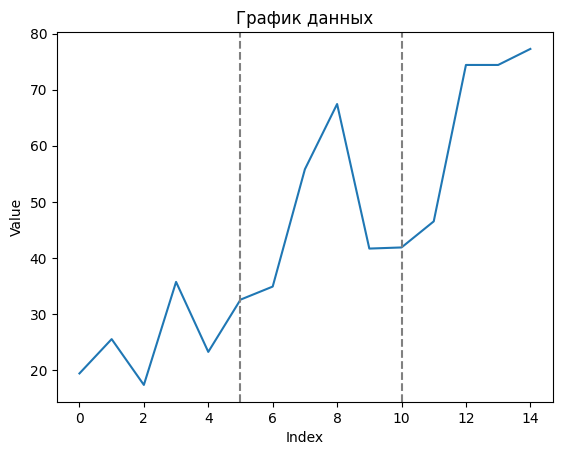

In [61]:
gr = [0.19387, 0.2551, 0.1734, 0.35714, 0.2323, 0.3255, 0.3488, 0.5581, 0.6744, 0.4166, 0.4186, 0.4651, 0.7441, 0.7441, 0.7727] 
for i in range(15):
    gr[i] = gr[i] * 100

plt.plot(gr)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('График данных')
plt.axvline(5,color = 'gray',linestyle='dashed')
plt.axvline(10,color = 'gray',linestyle='dashed')

plt.show()